# Fair Price Estimation 

## The utility indifference theory for derivatives pricing

### Call option premium using the utility indifference principle

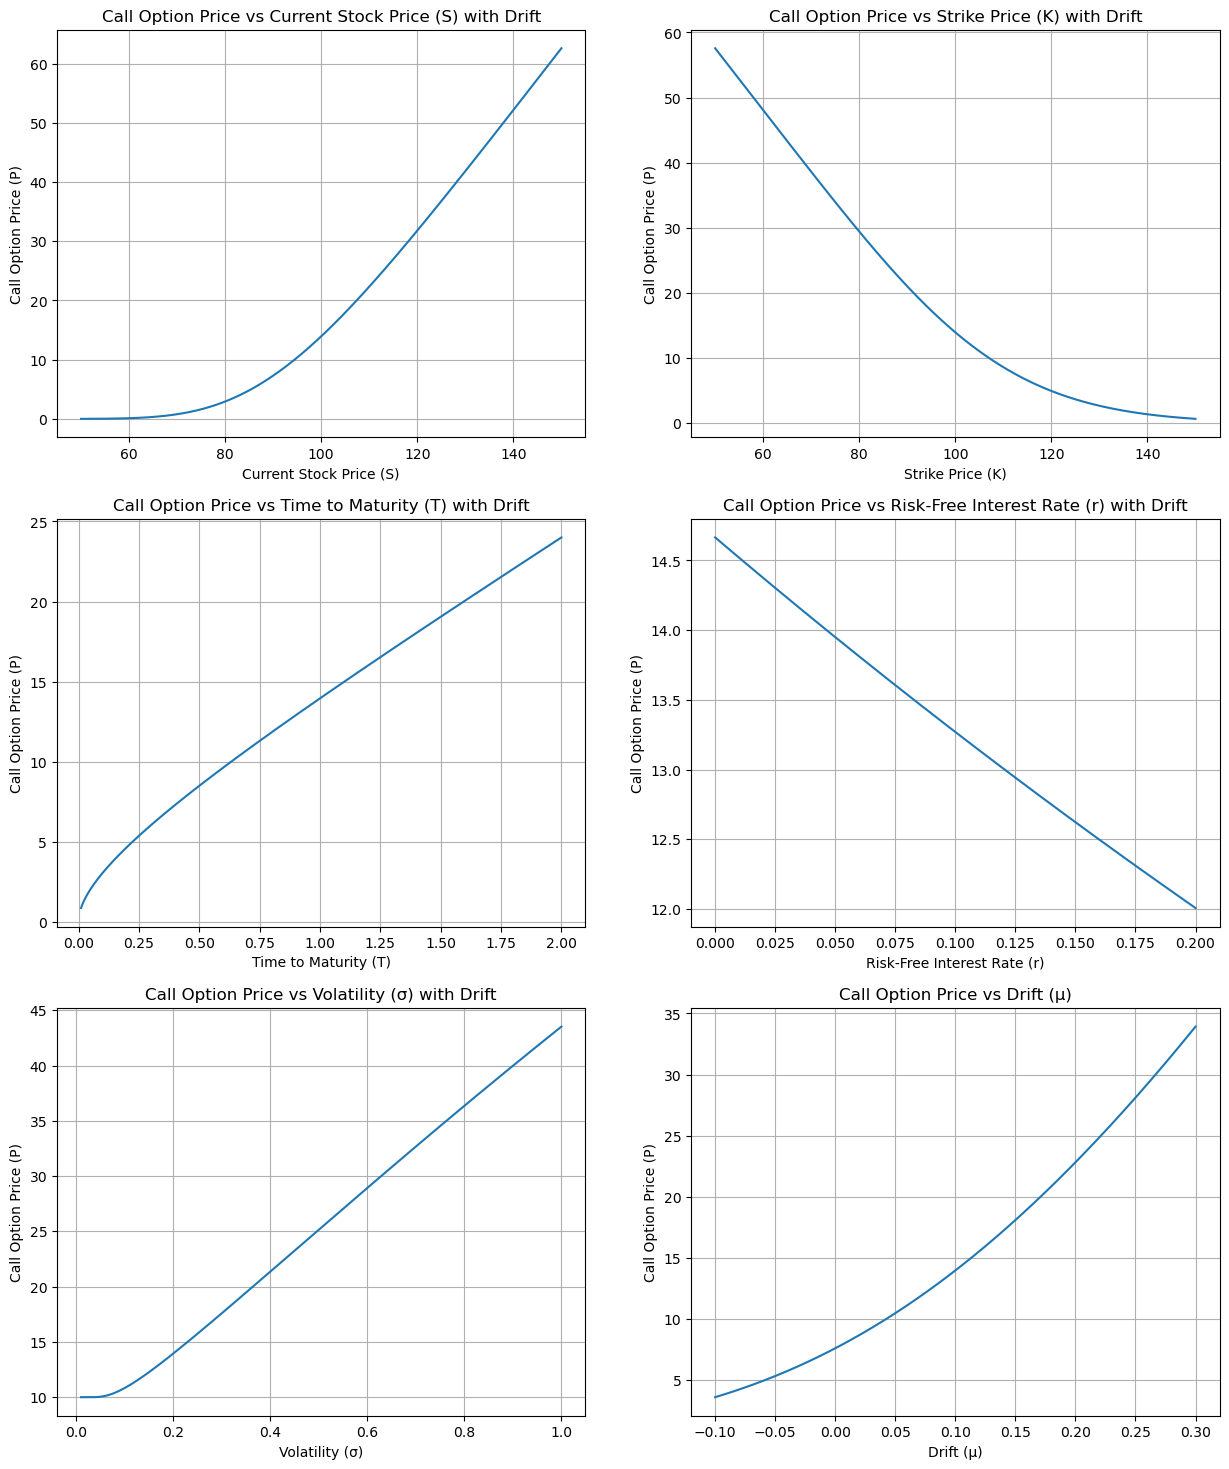

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes formula with drift implementation
def black_scholes_with_drift(S, K, T, t, r, mu, sigma):
    d1_mu = (np.log(S / K) + (mu + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2_mu = d1_mu - sigma * np.sqrt(T - t)
    call_price_with_drift = S * np.exp((mu - r) * (T - t)) * norm.cdf(d1_mu) - K * np.exp(-r * (T - t)) * norm.cdf(d2_mu)
    return call_price_with_drift

# Parameters for the plots
S_t = 100   # Current stock price
K = 100     # Strike price
T = 1       # Time to maturity (1 year)
t = 0       # Current time (now)
r = 0.05    # Risk-free interest rate (5%)
mu = 0.1    # Drift rate (10%)
sigma = 0.2 # Volatility (20%)

# Generate data for each dependency plot
S_values = np.linspace(50, 150, 400)
K_values = np.linspace(50, 150, 400)
T_values = np.linspace(0.01, 2, 400)
r_values = np.linspace(0, 0.2, 400)
sigma_values = np.linspace(0.01, 1, 400)
mu_values = np.linspace(-0.1, 0.3, 400)

# Calculate call prices with drift
C_S_drift = [black_scholes_with_drift(S, K, T, t, r, mu, sigma) for S in S_values]
C_K_drift = [black_scholes_with_drift(S_t, K, T, t, r, mu, sigma) for K in K_values]
C_T_drift = [black_scholes_with_drift(S_t, K, T, t, r, mu, sigma) for T in T_values]
C_r_drift = [black_scholes_with_drift(S_t, K, T, t, r, mu, sigma) for r in r_values]
C_sigma_drift = [black_scholes_with_drift(S_t, K, T, t, r, mu, sigma) for sigma in sigma_values]
C_mu_drift = [black_scholes_with_drift(S_t, K, T, t, r, mu, sigma) for mu in mu_values]

# Plotting all dependencies in a single figure for export

fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Current Stock Price (S) with Drift
axs[0, 0].plot(S_values, C_S_drift)
axs[0, 0].set_title('Call Option Price vs Current Stock Price (S) with Drift')
axs[0, 0].set_xlabel('Current Stock Price (S)')
axs[0, 0].set_ylabel('Call Option Price (P)')
axs[0, 0].grid(True)

# Strike Price (K) with Drift
axs[0, 1].plot(K_values, C_K_drift)
axs[0, 1].set_title('Call Option Price vs Strike Price (K) with Drift')
axs[0, 1].set_xlabel('Strike Price (K)')
axs[0, 1].set_ylabel('Call Option Price (P)')
axs[0, 1].grid(True)

# Time to Maturity (T) with Drift
axs[1, 0].plot(T_values, C_T_drift)
axs[1, 0].set_title('Call Option Price vs Time to Maturity (T) with Drift')
axs[1, 0].set_xlabel('Time to Maturity (T)')
axs[1, 0].set_ylabel('Call Option Price (P)')
axs[1, 0].grid(True)

# Risk-Free Interest Rate (r) with Drift
axs[1, 1].plot(r_values, C_r_drift)
axs[1, 1].set_title('Call Option Price vs Risk-Free Interest Rate (r) with Drift')
axs[1, 1].set_xlabel('Risk-Free Interest Rate (r)')
axs[1, 1].set_ylabel('Call Option Price (P)')
axs[1, 1].grid(True)

# Volatility (σ) with Drift
axs[2, 0].plot(sigma_values, C_sigma_drift)
axs[2, 0].set_title('Call Option Price vs Volatility (σ) with Drift')
axs[2, 0].set_xlabel('Volatility (σ)')
axs[2, 0].set_ylabel('Call Option Price (P)')
axs[2, 0].grid(True)

# Drift (μ)
axs[2, 1].plot(mu_values, C_mu_drift)
axs[2, 1].set_title('Call Option Price vs Drift (μ)')
axs[2, 1].set_xlabel('Drift (μ)')
axs[2, 1].set_ylabel('Call Option Price (P)')
axs[2, 1].grid(True)